In [28]:
import splitfolders
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator as Imgen

In [11]:
with zipfile.ZipFile("dataset.zip", "r") as zip_ref:
    zip_ref.extractall("./")

In [12]:
splitfolders.ratio("./dataset/",output='Split',ratio=(0.8,0.1,0.1))

Copying files: 5109 files [00:31, 159.98 files/s]


In [17]:
train_dir = "./Split/train"
val_dir = "./Split/val"
test_dir = "./Split/test"

In [18]:
train_ds = Imgen(rescale=1./255).flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    seed = 1,
                                                     batch_size=10
                                                    )
val_ds = Imgen(rescale=1./255).flow_from_directory(val_dir,
                                                    target_size=(224, 224),
                                                    seed = 1,
                                                     batch_size=10
                                                    )
test_ds = Imgen(rescale=1./255).flow_from_directory(test_dir,
                                                    target_size=(224, 224),
                                                    seed = 1,
                                                     batch_size=10
                                                    )

Found 4078 images belonging to 59 classes.
Found 503 images belonging to 59 classes.
Found 526 images belonging to 59 classes.


In [19]:
x_train,y_train = next(train_ds)
labels = train_ds.class_indices
labels

{'Anggrek Bulan Raksasa': 0,
 'Anggrek Hitam': 1,
 'Anjing Ajag': 2,
 'Anoa': 3,
 'Ayam Cemani': 4,
 'Babi Rusa': 5,
 'Badak Bercula Satu': 6,
 'Badak Sumatera': 7,
 'Banteng': 8,
 'Bekantan': 9,
 'Belalang Kembara': 10,
 'Berang Berang': 11,
 'Beruang Madu': 12,
 'Binturong': 13,
 'Bunga Cendana': 14,
 'Burung Cendrawasih': 15,
 'Burung Hantu Celepuk Jawa': 16,
 'Burung Jalak Bersayap Hitam': 17,
 'Diadem Leaf-Nosed Bat': 18,
 'Edelweiss Jawa': 19,
 'Elang Flores': 20,
 'Elang Jawa': 21,
 'Gajah Asia': 22,
 'Gajah Sumatera': 23,
 'Harimau Sumatera': 24,
 'Jalak Bali': 25,
 'Javan Blue-Banded Kingfisher': 26,
 'Kantong Semar': 27,
 'Katak Merah': 28,
 'Kelinci Sumatera': 29,
 'Kijang Kuning': 30,
 'King Cobra': 31,
 'Komodo': 32,
 'Kucing Kuwuk': 33,
 'Kucing Merah Kalimantan': 34,
 'Kukang Jawa': 35,
 'Kura-Kura Leher Ular Rote': 36,
 'Kuskus Beruang': 37,
 'Kuskus Scham Scham': 38,
 'Landak Jawa': 39,
 'Lutung Merah': 40,
 'Macan Tutul': 41,
 'Maleo': 42,
 'Merak Hijau': 43,
 'Orang 

In [20]:
pred_li = list(labels.keys())
pred_li

['Anggrek Bulan Raksasa',
 'Anggrek Hitam',
 'Anjing Ajag',
 'Anoa',
 'Ayam Cemani',
 'Babi Rusa',
 'Badak Bercula Satu',
 'Badak Sumatera',
 'Banteng',
 'Bekantan',
 'Belalang Kembara',
 'Berang Berang',
 'Beruang Madu',
 'Binturong',
 'Bunga Cendana',
 'Burung Cendrawasih',
 'Burung Hantu Celepuk Jawa',
 'Burung Jalak Bersayap Hitam',
 'Diadem Leaf-Nosed Bat',
 'Edelweiss Jawa',
 'Elang Flores',
 'Elang Jawa',
 'Gajah Asia',
 'Gajah Sumatera',
 'Harimau Sumatera',
 'Jalak Bali',
 'Javan Blue-Banded Kingfisher',
 'Kantong Semar',
 'Katak Merah',
 'Kelinci Sumatera',
 'Kijang Kuning',
 'King Cobra',
 'Komodo',
 'Kucing Kuwuk',
 'Kucing Merah Kalimantan',
 'Kukang Jawa',
 'Kura-Kura Leher Ular Rote',
 'Kuskus Beruang',
 'Kuskus Scham Scham',
 'Landak Jawa',
 'Lutung Merah',
 'Macan Tutul',
 'Maleo',
 'Merak Hijau',
 'Orang Utan',
 'Owa Jawa',
 'Paus Bungkuk',
 'Paus Minke Antartika',
 'Paus Pembunuh',
 'Pesut Mahakam',
 'Pimpinella Pruatjan',
 'Pohon Damar',
 'Rafflesia Arnoldi',
 'Rusa

In [21]:
un_labels = train_ds.classes
len(un_labels)

4078

In [24]:
un_animals = pd.DataFrame(un_labels).value_counts()
un_animals

55    1496
9       84
49      82
24      80
8       80
58      80
3       80
39      56
2       54
46      44
47      43
11      41
35      40
36      40
34      40
41      40
37      40
38      40
40      40
48      40
43      40
44      40
32      40
50      40
51      40
52      40
53      40
56      40
57      40
33      40
0       40
29      40
6       40
13      40
7       40
15      40
16      40
17      40
30      40
18      40
19      40
5       40
10      40
21      40
4       40
23      40
25      40
26      40
27      40
28      40
1       40
12      40
45      39
14      39
20      39
22      39
31      37
42      36
54      29
dtype: int64

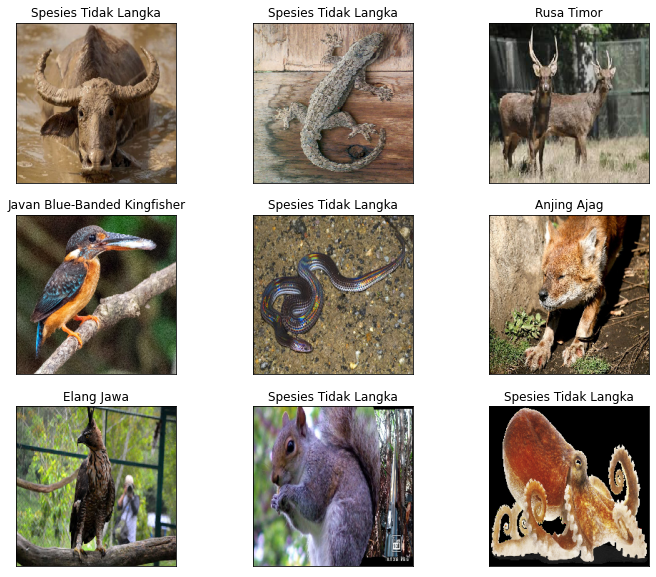

In [29]:
plt.figure(figsize=(12,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(pred_li[np.argmax(y_train[i])])